# Matplotlib Basics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0, 0.5, 'Y axis')

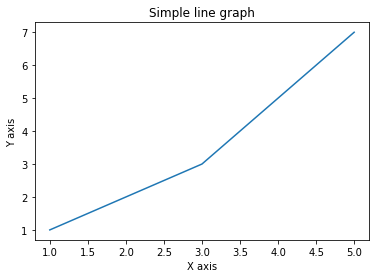

In [2]:
# simple line graph
plt.plot([1,2,3,5],[1,2,3,7])
plt.title('Simple line graph')
plt.xlabel('X axis')
plt.ylabel('Y axis')

###  1. Ploting equations

In [3]:
def plotter(x,y,title):
    plt.plot(x,y)
    plt.title(title, fontsize=15)
    plt.xlabel("Values of X")
    plt.ylabel("Values of Y")
    plt.show()

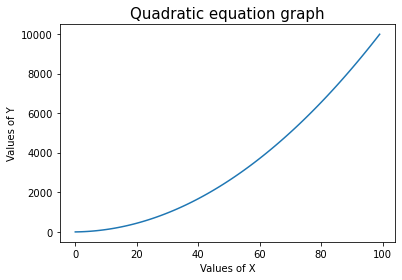

In [4]:
x = np.arange(0,100)
y = x*x + 2*x -12
plotter(x,y,'Quadratic equation graph')

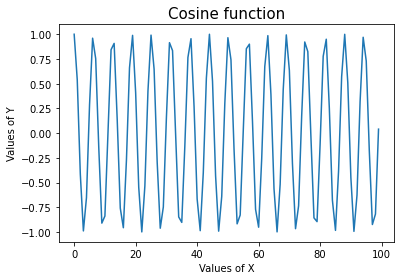

In [5]:
# Cos function
y = np.cos(x)
plotter(x,y,"Cosine function")
#plotter(x,np.sin(x),"Sine function",1)

### 2. Ploting Histograms

In [6]:
# Read csv
acsv= pd.read_csv('./datasets/auto-mpg.csv')
display(acsv.head())
display(type(acsv.columns))
display(acsv.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


pandas.core.indexes.base.Index

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

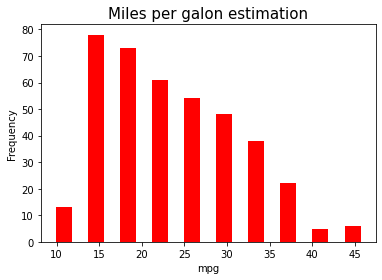

In [7]:
# MPG histogram
plt.figure()
plt.hist(acsv['mpg'], color = 'red', rwidth = 0.5)
plt.title('Miles per galon estimation', fontsize = 15)
plt.xlabel("mpg")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()
plt.show()

Text(0, 0.5, 'Frequency')

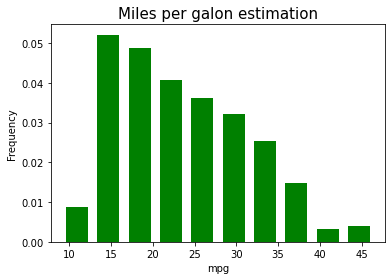

In [8]:
# desity in histogram
plt.figure()
plt.hist(acsv['mpg'],color = 'green', rwidth =0.7, density = True)
plt.title('Miles per galon estimation', fontsize = 15)
plt.xlabel("mpg")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

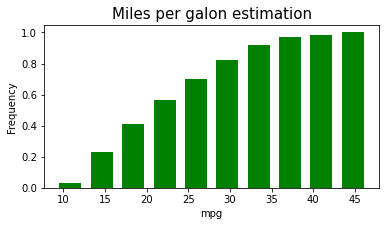

In [9]:
# Cumilative
# desity in histogram
plt.figure(figsize=(6,3))
plt.hist(acsv['mpg'],color = 'green', rwidth =0.7, density = True, cumulative=True)
plt.title('Miles per galon estimation', fontsize = 15)
plt.xlabel("mpg")
plt.ylabel("Frequency")

#### Converting datatypes inside datasets

In [10]:
acsv.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
acsv['horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [12]:
acsv[acsv['horsepower']=='?'].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [13]:
# removing '?' rows
acsv.drop([32, 126, 330, 336, 354, 374], inplace = True)
acsv[acsv['horsepower']=='?'].index

Int64Index([], dtype='int64')

In [14]:
# converting to float
acsv['horsepower']=acsv['horsepower'].astype('float')
acsv.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [15]:
acsv['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

#### Combining 2 histograms

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

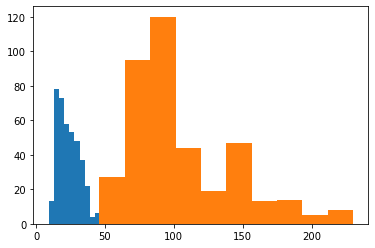

In [16]:
plt.hist(acsv['mpg'])
plt.hist(acsv['horsepower'])

<AxesSubplot:ylabel='Frequency'>

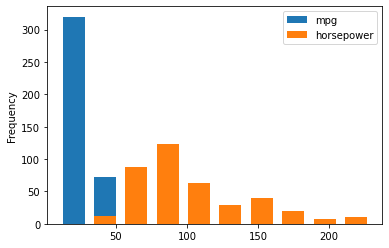

In [17]:
# More meaningful graph Combined graph
acsv[['mpg','horsepower']].plot.hist(rwidth=.7)

<AxesSubplot:ylabel='Density'>

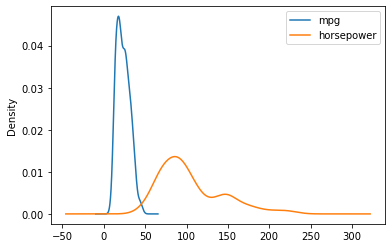

In [18]:
# More meaningful graph Combined graph
acsv[['mpg','horsepower']].plot.kde() # kernel based density estimation
# probability density of continuos variables

### 3. Scatter plots

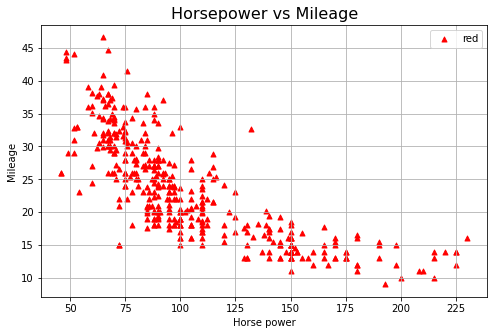

In [19]:
# Scatter plots
plt.figure(figsize=(8,5))
plt.scatter(acsv['horsepower'],acsv['mpg'], s= 25, c ='red' , marker = '^', label ='red')
plt.title("Horsepower vs Mileage", fontsize = 16)
plt.xlabel("Horse power")
plt.ylabel("Mileage")
plt.legend() #only needed when u have multiple labels/plots in one fig, use 'label' in scatter
plt.grid(True)

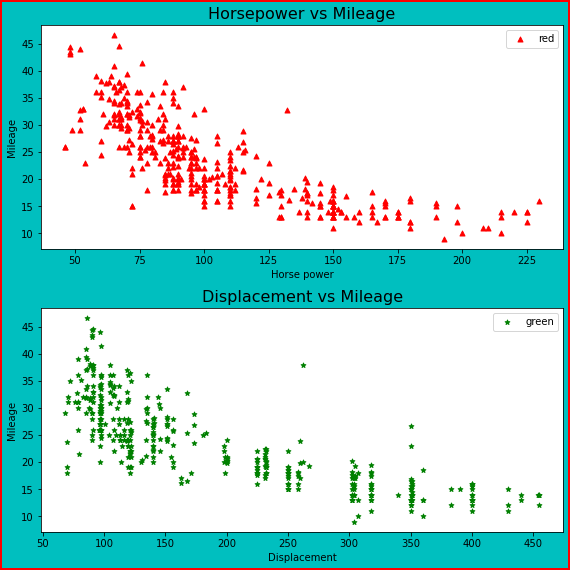

In [20]:
# tight layout and subplots
plt.figure(figsize=(8,8),linewidth = 4, edgecolor='r',facecolor='c')

#subplot 1
plt.subplot(2,1,1)
plt.scatter(acsv['horsepower'],acsv['mpg'], s= 25, c ='red' , marker = '^', label ='red')
plt.title("Horsepower vs Mileage", fontsize = 16)
plt.xlabel("Horse power")
plt.ylabel("Mileage")
plt.legend()
#subplot 2
plt.subplot(2,1,2)
plt.scatter(acsv['displacement'],acsv['mpg'], s= 25, c ='green' , marker = '*', label ='green')
plt.title('Displacement vs Mileage', fontsize = 16)
plt.xlabel("Displacement")
plt.ylabel("Mileage")
plt.legend()

# tight layout
plt.tight_layout(pad = 1)

### 4. Box plots

Text(0.5, 0, 'MPG')

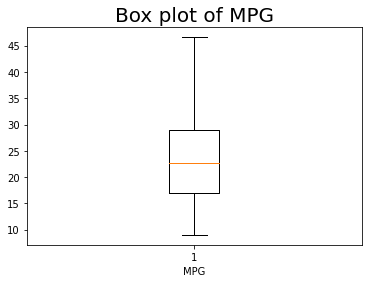

In [21]:
# box plot in matplotlib
# gives upper and lower quartile plus median
plt.boxplot(x='mpg', data = acsv)
plt.title("Box plot of MPG", fontsize = 20)
plt.xlabel("MPG")